# Introduction :   Feature Scaling



A key skills you're gonna need as an AI Engineer is Statistical Concepts, this concepts may be a bit hard to grasp at first but with practice and time you'll get the hang of it.

 In this notebook we'll be covering  Normalization & Standardization, and where should we use it.

# Intution :


Before we proceed, let' me show you practically something 

In [50]:
# import 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

(0.0, 50.0)

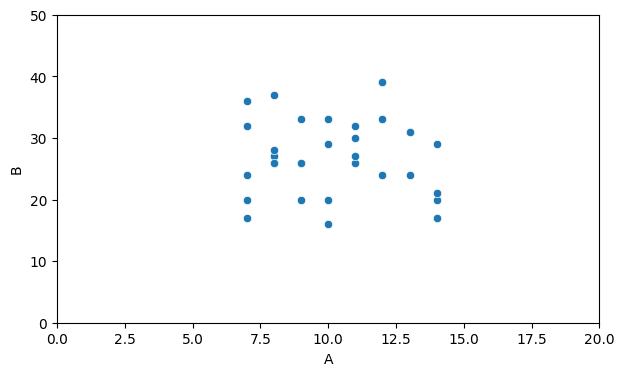

In [51]:
df = pd.DataFrame({'A':np.random.randint(7,15,30),'B':np.random.randint(15,40,30)})

plt.figure(figsize=(7,4))
sns.scatterplot(x='A',y='B',data=df)
plt.xlim(0,20)
plt.ylim(0,50)

We created some random data points and we ploted it, nothing special here.


Now let's do somthing more intersting :

(0.0, 50.0)

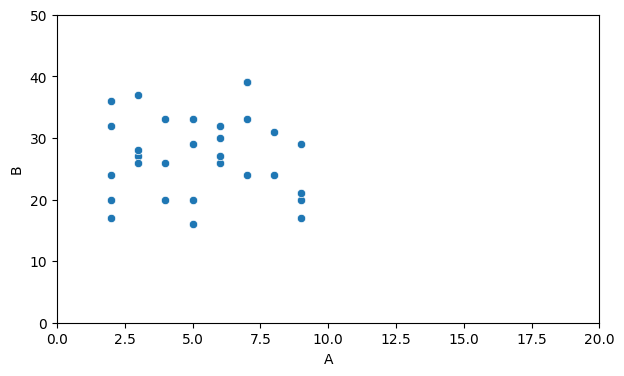

In [52]:
df['A'] = df['A'].apply(lambda x:x-5)

plt.figure(figsize=(7,4))
sns.scatterplot(x='A',y='B',data=df)
plt.xlim(0,20)
plt.ylim(0,50)

Hmmmmm , what's going on here ? 
the data was **shiftted** to the left 

We call transforming data points ```x``` to be ```x' = x + m    ```     **Scaling** , Now let's try somthing else :

(0.0, 50.0)

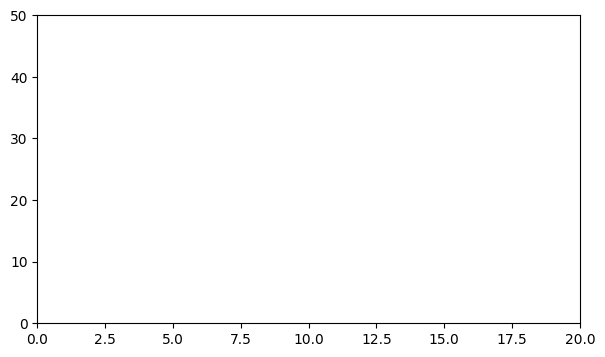

In [53]:
df['B'] = df['B'].apply(lambda x:x/2)
plt.figure(figsize=(7,4))
plt.xlim(0,20)
plt.ylim(0,50)

Well what we did here? we **scaled** the data points by a factor of 2.

so call transforming data points ```x``` to    ```x' = x/n   ```  **Scaling** 

# Normalization :



Normalization is just a form of scaling, where we scale the data points to be between 0 and 1, and we do that by dividing the data points by the maximum value of the data points.

Any function that maps the data points to be between -1 and 1 is called a **Normalizing Function**, but we generally refer to the function that maps the data points to be between 0 and 1 as **Normalization**.
There's a lot of Normalizing Functions, but the most common one is the **Min-Max Normalization** :
    
    ```x' = (x - min(x))/(max(x) - min(x))```

some other Normalizing Functions are :

    ```x' = 1 / (1 + e^-x)```               **Logistic Normalization**
    ```x' = (x - mean(x)) / std(x)```       **Z-Score Normalization**
    ```x' = x / (x^2 + 1)```                **Hyperbolic Tangent Function**
    ```x' = x / (1 + |x|)```                **ArcTan Function**


We can apply Normalization to any data points, but it's mostly used for **Continuous Data**.

#### Now let's code it using sklearn module ```sklearn.preprocessing.MinMaxScaler```

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
scaled_features = scaler.transform(df)
df_norm = pd.DataFrame(scaled_features,columns=df.columns)

(0.0, 1.0)

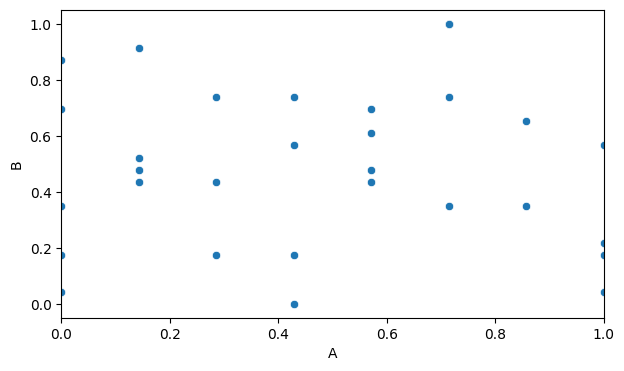

In [55]:
plt.figure(figsize=(7,4))
sns.scatterplot(x='A',y='B',data=df_norm)
plt.xlim(0,1)

**Quite simple right ?**

# Standardization :


Just like Normalization, Standardization is also a form of scaling, but instead of scaling the data points to be between 0 and 1, we scale the data points to have a mean of 0 and a standard deviation of 1.

we do that by subtracting the mean of the data points from the data points and then dividing the result by the standard deviation of the data points.

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
scaled_features = scaler.transform(df)
df_standr = pd.DataFrame(scaled_features,columns=df.columns)

(-2.0, 2.0)

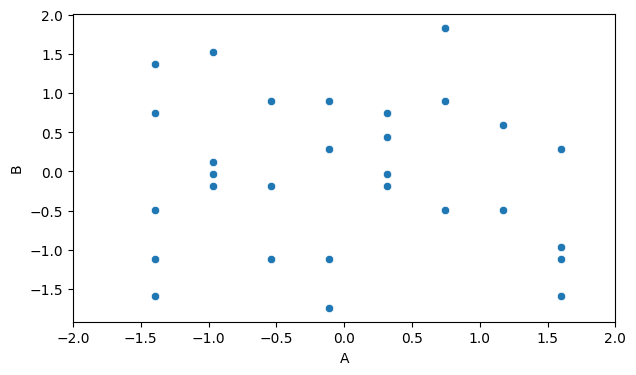

In [57]:
plt.figure(figsize=(7,4))
sns.scatterplot(x='A',y='B',data=df_standr)
plt.xlim(-2,2)

# Why Normalization & Standardization ?



Normalization & Standardization are used to make the data points have a similar scale, and that's important because some machine learning algorithms don't work well if the data points have different scales.

Any ML model that uses distance measures between data points, like KNN, K-Means, and SVM, will work better if the data points are scaled, and may lead to bad results if we used the data points without scaling them. in example, if we used the data points without scaling them, the KNN model will give more weight to the data points that have a higher value, and that's not what we want.
An other example is the Linear Regression model, if we used the data points without scaling them, the model will give more weight to the data points that have a higher value, this bias will lead to poor results.


Also one of the most important reasons for scaling the data points is that it will speed up the training process, and that's because the ML model will converge faster to the global minimum of the cost function. let's test it out :

In [58]:
# lets add some new features with high values

df['D'] = np.random.randint(10000000,1100000000,30)
df['E'] = np.random.randint(100000000,1000000000,30)

In [59]:
# Testing on Leniar regression

from sklearn.linear_model import LinearRegression
import time

lm = LinearRegression()

# fit the model to the data without normalization

t0 = time.time()
lm.fit(df[['A','B','D','E']],df['E'])
t1 = time.time() - t0
print('time taken to fit the model is {} seconds'.format(t1))

time taken to fit the model is 0.005999565124511719 seconds


In [60]:
# normlize the new features we added

normlizer = MinMaxScaler()
normlizer.fit(df[['D','E']])
scaled_features = normlizer.transform(df[['D','E']])
df_norm = pd.concat([df_norm , pd.DataFrame(scaled_features,columns=['D','E'])],axis=1)


# fit the model to the data with normalization

lm2 = LinearRegression()
t0 = time.time()
lm2.fit(df_norm[['A','B','D','E']],df_norm['E'])
t1 = time.time() - t0
print('time taken to fit the model is {} seconds'.format(t1))

time taken to fit the model is 0.005997896194458008 seconds


When you excute the code above multiple times, you'll notice that the model with scaled data points converges faster than the model with unscaled data points. the reason for that is that the model with scaled data points will take smaller steps to reach the global minimum of the cost function, and that's because the scaled data points have a similar scale, and that's what we want.

you may see that the non-scaled model converges faster than the scaled model, but that's because the non-scaled model initialized with a better set of parameters, and that's why it converges faster than the scaled model, but as a general rule, the scaled model will converge faster than the non-scaled model.

# When to use Normalization & Standardization ?


So if both Normalization & Standardization are used to make the data points have a similar scale, then why do we need both of them ?

Well the answer here is according to the conext, normalization can be more effective than standardization, and vice versa, and that's because the data points may not be normally distributed, and that's why we need both Normalization & Standardization.

So when should we use Normalization & Standardization ?

#### Normalization :

- You need to scale the data to a fixed range (such as 0 to 1)
- You want to compare variables that have different units of measurement
- You have a large range of data and want to compress it to a smaller range


#### Standardization :

- You need to compare variables that have different means and standard deviations
- Dataset has outliers



#### I hope you enjoyed this notebook, and if you did, please upvote it, and if you have any questions, please leave a comment below, and I'll be happy to answer it.